<a href="https://colab.research.google.com/github/efemeryczny/network_analysis/blob/main/analiza_sieciowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
wig_banki = ['alr', 'bhw', 'bnp', 'bos', 'gtn', 'ing', 'mbk', 'mil','peo', 'pko', 'san', 'spl', 'ucg']

In [4]:
urls = []
for bank in wig_banki:
  url = f'https://stooq.pl/q/h/?s={bank}'
  urls.append(url)

In [9]:
urls

['https://stooq.pl/q/h/?s=alr',
 'https://stooq.pl/q/h/?s=bhw',
 'https://stooq.pl/q/h/?s=bnp',
 'https://stooq.pl/q/h/?s=bos',
 'https://stooq.pl/q/h/?s=gtn',
 'https://stooq.pl/q/h/?s=ing',
 'https://stooq.pl/q/h/?s=mbk',
 'https://stooq.pl/q/h/?s=mil',
 'https://stooq.pl/q/h/?s=peo',
 'https://stooq.pl/q/h/?s=pko',
 'https://stooq.pl/q/h/?s=san',
 'https://stooq.pl/q/h/?s=spl',
 'https://stooq.pl/q/h/?s=ucg']

In [13]:
all_tables = []
for i, url in enumerate(urls):
  tables = pd.read_html(url)
  table = tables[1].dropna()
  ticker = wig_banki[i]
  table['company'] = ticker
  all_tables.append(table)

<ipython-input-13-f28a602cc383>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['company'] = ticker
<ipython-input-13-f28a602cc383>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['company'] = ticker
<ipython-input-13-f28a602cc383>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [14]:
combined_table=pd.concat(all_tables)

In [15]:
combined_table

,Lp,Akcjonariusz,Udział w kapitale,Liczba akcji,Ostatnia zmiana,Wartość rynkowa (PLN),Udział na WZA,Liczba głosów,Ostatnia zmiana.1,Data aktualizacji,company
5,1,PZU SA,31.91%,41658850.0,0.0,1.77 mld,31.91%,41658850.0,0.0,4 lis 2022,alr
6,2,OFE Nationale-Nederlanden,9.34%,12196509.0,-198000.0,518 mln,9.34%,12196509.0,-198000.0,30 gru 2022,alr
7,3,OFE Allianz Polska,8.83%,11526440.0,9607180.0,490 mln,8.83%,11526440.0,9607180.0,12 maj 2023,alr
8,4,OFE PKO BP Bankowy,4.76%,6209081.0,70943.0,264 mln,4.76%,6209081.0,70943.0,30 gru 2022,alr
9,5,OFE NNLife,3.45%,4502562.0,0.0,191 mln,3.45%,4502562.0,0.0,30 gru 2022,alr
...,...,...,...,...,...,...,...,...,...,...,...
12,8,OFE UNIQA,0.05%,1013978.0,1491.0,87.7 mln,0.05%,1013978.0,1491.0,30 gru 2022,ucg
13,9,OFE PKO BP Bankowy,0.05%,894812.0,0.0,77.4 mln,0.05%,894812.0,0.0,30 gru 2022,ucg
14,10,OFE Allianz Polska,0.04%,738455.0,3838.0,63.8 mln,0.04%,738455.0,3838.0,30 gru 2022,ucg
15,11,OFE Generali,0.03%,603125.0,887.0,52.1 mln,0.03%,603125.0,887.0,30 gru 2022,ucg


In [16]:
combined_table.to_csv('combined_table.csv', index=False)

In [35]:
combined_table = combined_table.rename(columns={'Wartość rynkowa (PLN)': 'Value'})
# print(combined_table.columns)

combined_table['Value'] = combined_table['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(' ', '')
combined_table['Value'] = combined_table['Value'].astype(int)

print(combined_table)

    Lp               Akcjonariusz Udział w kapitale  Liczba akcji  \
5    1                     PZU SA            31.91%    41658850.0   
6    2  OFE Nationale-Nederlanden             9.34%    12196509.0   
7    3         OFE Allianz Polska             8.83%    11526440.0   
8    4         OFE PKO BP Bankowy             4.76%     6209081.0   
9    5                 OFE NNLife             3.45%     4502562.0   
..  ..                        ...               ...           ...   
12   8                  OFE UNIQA             0.05%     1013978.0   
13   9         OFE PKO BP Bankowy             0.05%      894812.0   
14  10         OFE Allianz Polska             0.04%      738455.0   
15  11               OFE Generali             0.03%      603125.0   
16  12        OFE Pocztylion Arka             0.02%      336977.0   

    Ostatnia zmiana         Value Udział na WZA  Liczba głosów  \
5               0.0  177000000000        31.91%     41658850.0   
6         -198000.0     518000000      

<ipython-input-35-1a155388d58b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_table['Value'] = combined_table['Value'].str.replace('mld','000000000').str.replace('mln','000000').str.replace('tys', '000').str.replace('.', '').str.replace(' ', '')


In [17]:
G =nx.from_pandas_edgelist(combined_table, 'Akcjonariusz', 'company', edge_attr=True)

In [19]:
edgelist = nx.to_edgelist(G)

In [20]:
colors = []
for node in G:
  if node in combined_table['company'].values:
    colors.append('red')
  else:
    colors.append('blue')

In [21]:
G.degree()

DegreeView({'PZU SA': 2, 'alr': 33, 'OFE Nationale-Nederlanden': 11, 'OFE Allianz Polska': 9, 'OFE PKO BP Bankowy': 9, 'OFE NNLife': 8, 'OFE Aegon': 10, 'OFE Generali': 10, 'OFE UNIQA': 11, 'TFI NN Investment Partners SA': 9, 'TFI Aviva Investors Poland SA': 8, 'TFI Santander SA': 9, 'TFI PKO SA': 9, 'OFE Pocztylion Arka': 10, 'TFI Esaliens SA': 8, 'Norges Bank (Government of Norway)': 8, 'TFI Pekao SA': 9, 'TFI Allianz Polska SA': 6, 'TFI PZU SA': 9, 'TFI Skarbiec SA': 7, 'TFI Uniqa SA': 8, 'TFI Generali Investment SA': 9, 'TFI Millennium SA': 7, 'TFI Opera SA': 7, 'TFI Rockbridge SA': 8, 'TFI Quercus SA': 9, 'TFI BNP Paribas SA': 7, 'DFE PKO': 4, 'TFI AgioFunds SA': 2, 'TFI Ipopema SA': 7, 'TFI Investors SA': 8, 'TFI Noble Funds SA': 6, 'TFI Credit Agricole': 7, 'DFE Nationale-Nederlanden': 2, 'Citibank Overseas Investment Corporation': 1, 'bhw': 28, 'OFE Drugi Allianz': 7, 'OFE PZU Złota Jesień': 9, 'BNP Paribas SA': 1, 'bnp': 24, 'BNP Paribas Fortis SA/NV': 1, 'DFE PZU': 4, 'TFI Al

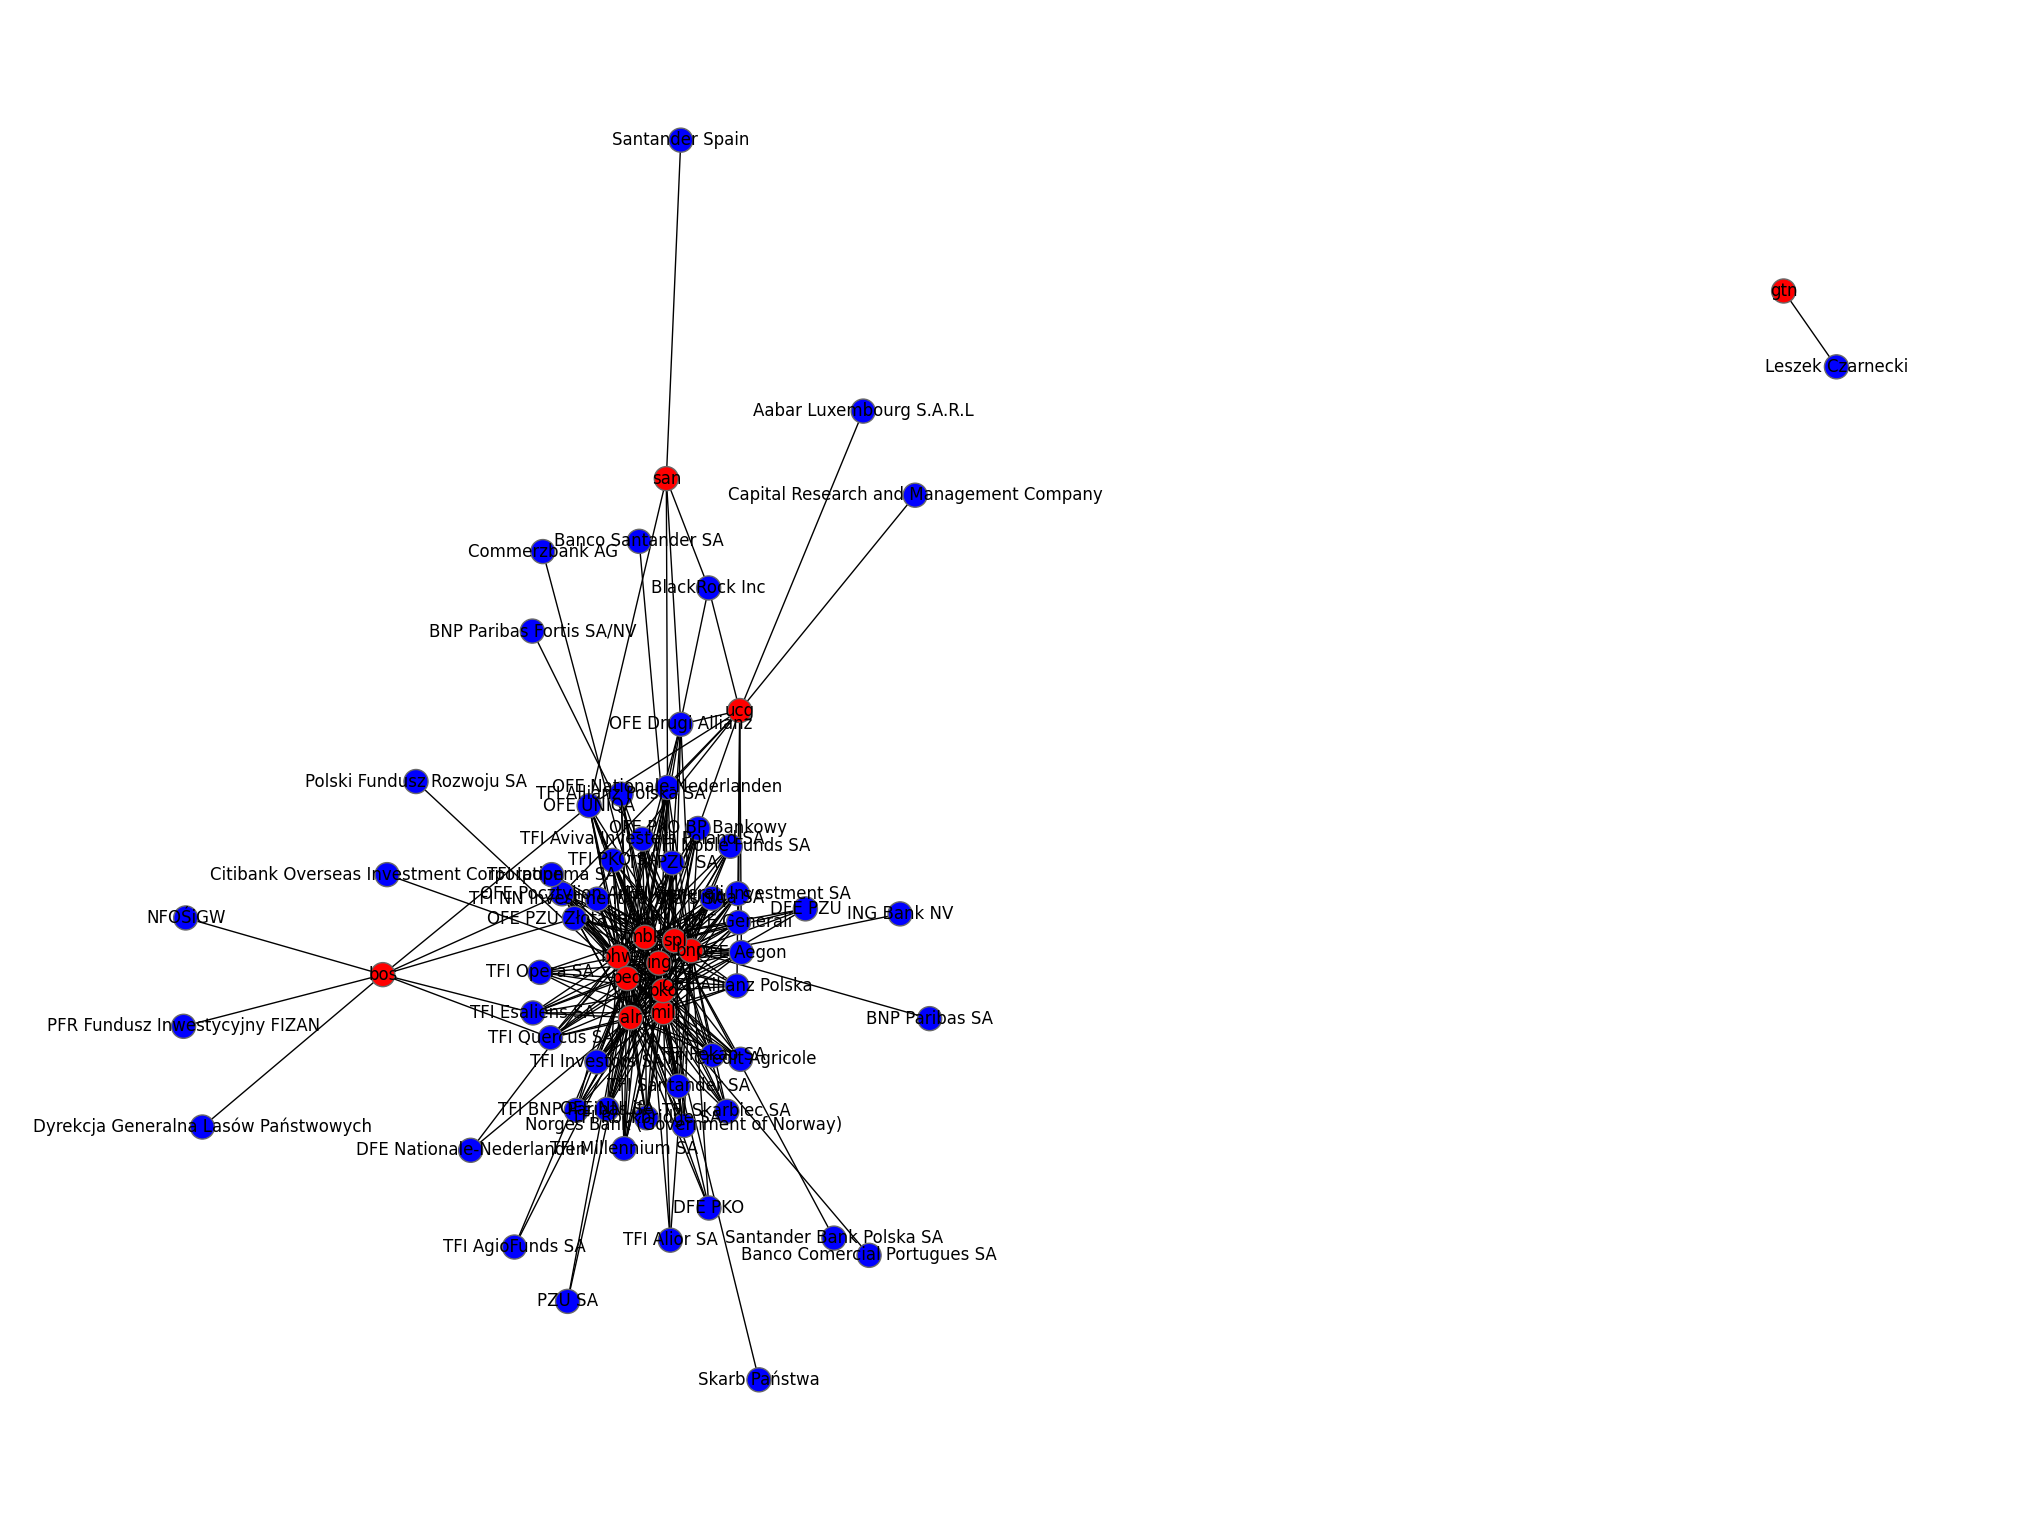

In [29]:
plt.figure(figsize=(20,15))
nx.draw(G, with_labels=True,
        node_color=colors)

ax = plt.gca()
ax.collections[0].set_edgecolor('#696969')

Empty DataFrame
Columns: [<html><head><meta http-equiv=content-type content=text/html;charset=utf-8><meta name=keywords content="wig_banki,  wig_banki,  komponenty,  spÃ³Åki skÅadowe,  skÅad,  konstrukcja indeksu"><meta name=description content="Komponenty indeksÃ³w gieÅdowych"><title>WIG_BANKI - WIG-Banki - Stooq</title><script>var $=function(s){return document.getElementById(s)};!function(n, e, o){function t(n, e){return typeof n===e}function s(){var n, e.1, o, s, a, f, l;for(var c in i)if(i.hasOwnProperty(c)){if(n=[], e=i[c], e.name&&(n.push(e.name.toLowerCase()), e.options&&e.options.aliases&&e.options.aliases.length))for(o=0;o<e.options.aliases.length;o++)n.push(e.options.aliases[o].toLowerCase());for(s=t(e.fn, function)?e.fn():e.fn, a=0;a<n.length;a++)f=n[a], l=f.split("."), 1===l.length?Modernizr[l[0]]=s:(!Modernizr[l[0]]||Modernizr[l[0]]instanceof Boolean||(Modernizr[l[0]]=new Boolean(Modernizr[l[0]])), Modernizr[l[0]][l[1]]=s), r.push((s?"":"no-")+l.join("-"))}}var i=[], a